In [41]:
import numpy as np
import pandas as pd
import geopandas as gpd
import os

In [2]:
ExoData = pd.read_csv(os.path.join("PS_2022.03.03_15.38.42.csv"), skiprows = 96, na_values={'', 'undefined', 'NaN'})
min(ExoData['ra']), max(ExoData['ra']), min(ExoData['dec']), max(ExoData['dec'])

(0.1856063, 359.9749837, -88.1211107, 85.7365329)

In [ ]:
ExoData_default = ExoData[ExoData['default_flag']==1]
ExoData.shape, ExoData_default.shape

In [5]:
ExoData1 = ExoData_default[ExoData_default['ra']>180]
ExoData2 = ExoData_default[ExoData_default['ra']<=180]

#https://sciencing.com/calculate-longitude-right-ascension-6742230.html
ExoData1['lat'] = ExoData1['dec']
ExoData2['lat'] = ExoData2['dec']
ExoData1['long'] = ExoData1['ra']-360
ExoData2['long'] = ExoData2['ra']

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [6]:
ExoData_new = pd.concat([ExoData1, ExoData2])
print(ExoData1.shape, "+", ExoData2.shape, "=", ExoData_new.shape)
print("longitude range:", min(ExoData_new['long']), max(ExoData_new['long']) )
print("latitude range:", min(ExoData_new['lat']), max(ExoData_new['lat']) )

(3827, 94) + (1108, 94) = (4935, 94)
longitude range: -179.834928 179.9397081
latitude range: -88.1211107 85.7365329


In [77]:
min(ExoData_new.disc_year), max(ExoData_new.disc_year) 
#ExoData.columns
ExoData.hostname.unique()

array(['11 Com', '11 UMi', '14 And', ..., 'ups And', 'ups Leo', 'xi Aql'],
      dtype=object)

In [78]:
ExoData_new.filter( items={
"pl_name", 
"disc_year", 
"discoverymethod",
"disc_facility",
"sy_snum",
"sy_pnum",
"sy_mnum",
"pl_orbper",
"pl_rade",
"pl_radj",
"pl_masse",
"pl_massj",
"pl_dens",
"st_spectype",
"sy_dist",
"ra",
"dec"
}, axis=1).sample(10)

ExoData_new.discoverymethod.value_counts()
#ExoData_new.hostname.value_counts()

Transit                          3780
Radial Velocity                   915
Microlensing                      124
Imaging                            58
Transit Timing Variations          22
Eclipse Timing Variations          16
Orbital Brightness Modulation       9
Pulsar Timing                       7
Pulsation Timing Variations         2
Astrometry                          1
Disk Kinematics                     1
Name: discoverymethod, dtype: int64

In [9]:
ExoData_new.to_csv('ExoData.csv')

In [10]:
gdf = gpd.GeoDataFrame(
    ExoData_new, geometry=gpd.points_from_xy(ExoData_new.long, ExoData_new.lat))

<AxesSubplot:>

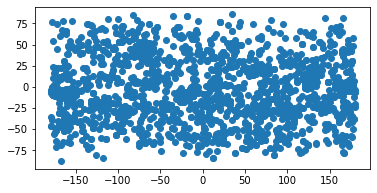

In [11]:
gdf.plot()

In [12]:
2022-1989


33